<a href="https://colab.research.google.com/github/amandamarilia/Case-1-/blob/main/Desafio_Prepare_seu_dataset_para_modelagem_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandasql

import numpy as np
import pandas as pd
from pandasql import sqldf



import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=7f1e340c14556b3f32f924b762b501cbeff74e064bdff103b73fc014c82442d3
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
#Importação do doc
df = pd.read_csv('Data.csv')
df.head(100)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6.0,12/1/2010 09:37,2.55,14688.0,United Kingdom
96,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120.0,12/1/2010 09:37,0.42,14688.0,United Kingdom
97,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24.0,12/1/2010 09:37,0.55,14688.0,United Kingdom
98,536378,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24.0,12/1/2010 09:37,0.55,14688.0,United Kingdom


In [ ]:
#Describe das informações
df.describe()

,Quantity,UnitPrice,CustomerID
count,163173.000000,163173.000000,113614.000000
mean,9.048568,5.058745,15287.524390
std,265.616357,98.669623,1732.896383
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13842.000000
50%,3.000000,2.460000,15190.500000
75%,10.000000,4.210000,16843.000000
max,74215.000000,16888.020000,18283.000000


In [ ]:
#Identificação dos valores nulos
df_missing = (
  df.isna().sum()
  .to_frame('missing_count')
  .join((df.isna().sum() / df.shape[0]).to_frame('missing_pct'))
  .sort_values('missing_count', ascending=False)
)
df_missing.style.format('{:.2%}', subset=['missing_pct'])

,missing_count,missing_pct
CustomerID,49560,30.37%
Description,630,0.39%
Quantity,1,0.00%
InvoiceDate,1,0.00%
UnitPrice,1,0.00%
Country,1,0.00%
InvoiceNo,0,0.00%
StockCode,0,0.00%


In [ ]:
df[df.isna().any(axis=1)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56.0,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1.0,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2.0,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4.0,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2.0,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
163169,550541,22637,PIGGY BANK RETROSPOT,1.0,4/19/2011 11:33,4.96,NaN,United Kingdom
163170,550541,22649,STRAWBERRY FAIRY CAKE TEAPOT,1.0,4/19/2011 11:33,10.79,NaN,United Kingdom
163171,550541,22676,FRENCH BLUE METAL DOOR SIGN 1,1.0,4/19/2011 11:33,2.46,NaN,United Kingdom
163172,550541,22677,FRENCH BLUE METAL DOOR SIGN 2,1.0,4/19/2011 11:33,2.46,NaN,United Kingdom


In [ ]:
#Remoção dos valores nulos
df.dropna(subset=['CustomerID'])

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
163101,550539,37495,FAIRY CAKE BIRTHDAY CANDLE SET,4.0,4/19/2011 11:27,3.75,13479.0,United Kingdom
163102,550539,22505,MEMO BOARD COTTAGE DESIGN,4.0,4/19/2011 11:27,4.95,13479.0,United Kingdom
163103,550539,22189,CREAM HEART CARD HOLDER,4.0,4/19/2011 11:27,3.95,13479.0,United Kingdom
163104,C550540,POST,POSTAGE,-1.0,4/19/2011 11:31,3.82,14339.0,United Kingdom


In [ ]:
df.head(200)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
195,536388,22469,HEART OF WICKER SMALL,12.0,12/1/2010 09:59,1.65,16250.0,United Kingdom
196,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,12/1/2010 09:59,1.65,16250.0,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6.0,12/1/2010 10:03,8.50,12431.0,Australia
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8.0,12/1/2010 10:03,4.95,12431.0,Australia


In [ ]:
df.isna().sum()

InvoiceNo          0
StockCode          0
Description      630
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     49560
Country            1
dtype: int64

In [ ]:
#filtro para verificar se existem dados nulos ou menor que zero na coluna de preços

consulta = '''
SELECT *
FROM df
WHERE UnitPrice IS NULL OR UnitPrice <= 0
'''
resultado = sqldf (consulta)
print(resultado)


    InvoiceNo StockCode                          Description  Quantity  \
0      536414     22139                                 None      56.0   
1      536545     21134                                 None       1.0   
2      536546     22145                                 None       1.0   
3      536547     37509                                 None       1.0   
4      536549    85226A                                 None       1.0   
..        ...       ...                                  ...       ...   
959    550188     22636   CHILDS BREAKFAST SET CIRCUS PARADE       1.0   
960    550460    47556B  did  a credit  and did not tick ret    1300.0   
961    550501    35915C                                 None      30.0   
962    550502    84535A                                 None     320.0   
963    550541     22678                       FRENCH BLUE ME       NaN   

         InvoiceDate  UnitPrice  CustomerID         Country  
0    12/1/2010 11:52        0.0         NaN  Unit

In [ ]:
#Preços acima de zero
consulta = '''
SELECT *
FROM df
WHERE UnitPrice > 0
'''
resultado = sqldf (consulta)
print(resultado)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
162205    550541     22620          4 TRADITIONAL SPINNING TOPS       1.0   
162206    550541     22637                 PIGGY BANK RETROSPOT       1.0   
162207    550541     22649         STRAWBERRY FAIRY CAKE TEAPOT       1.0   
162208    550541     22676        FRENCH BLUE METAL DOOR SIGN 1       1.0   
162209    550541     22677        FRENCH BLUE METAL DOOR SIGN 2       1.0   

            InvoiceDate  UnitPrice  CustomerID         Country  
0       12

In [ ]:
#filtro para verificar se existem dados nulos ou menor que zero na coluna de Qntd

consulta = '''
SELECT *
FROM df
WHERE Quantity IS NULL OR Quantity <= 0
'''
resultado = sqldf (consulta)
print(resultado)

     InvoiceNo StockCode                         Description  Quantity  \
0      C536379         D                            Discount      -1.0   
1      C536383    35004C     SET OF 3 COLOURED  FLYING DUCKS      -1.0   
2      C536391     22556       PLASTERS IN TIN CIRCUS PARADE     -12.0   
3      C536391     21984     PACK OF 12 PINK PAISLEY TISSUES     -24.0   
4      C536391     21983     PACK OF 12 BLUE PAISLEY TISSUES     -24.0   
...        ...       ...                                 ...       ...   
3502   C550538     37495      FAIRY CAKE BIRTHDAY CANDLE SET      -2.0   
3503   C550538     22060     LARGE CAKE STAND HANGING HEARTS      -1.0   
3504   C550540      POST                             POSTAGE      -1.0   
3505   C550540     23155  KNICKERBOCKERGLORY MAGNET ASSORTED     -12.0   
3506    550541     22678                      FRENCH BLUE ME       NaN   

          InvoiceDate  UnitPrice  CustomerID         Country  
0     12/1/2010 09:41      27.50     14527.0  Un

In [ ]:
#Quantidade acima de zero

consulta = '''
SELECT *
FROM df
WHERE Quantity  > 0
'''
resultado = sqldf (consulta)
print(resultado)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER       6.0   
1         536365     71053                  WHITE METAL LANTERN       6.0   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER       8.0   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE       6.0   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.       6.0   
...          ...       ...                                  ...       ...   
159662    550541     22620          4 TRADITIONAL SPINNING TOPS       1.0   
159663    550541     22637                 PIGGY BANK RETROSPOT       1.0   
159664    550541     22649         STRAWBERRY FAIRY CAKE TEAPOT       1.0   
159665    550541     22676        FRENCH BLUE METAL DOOR SIGN 1       1.0   
159666    550541     22677        FRENCH BLUE METAL DOOR SIGN 2       1.0   

            InvoiceDate  UnitPrice  CustomerID         Country  
0       12

In [ ]:
#Remoção dos valores menores ou iguais a zero
df = df.drop(df[df['UnitPrice'] <= 0].index)
df.head(200)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
195,536388,22469,HEART OF WICKER SMALL,12.0,12/1/2010 09:59,1.65,16250.0,United Kingdom
196,536388,22242,5 HOOK HANGER MAGIC TOADSTOOL,12.0,12/1/2010 09:59,1.65,16250.0,United Kingdom
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6.0,12/1/2010 10:03,8.50,12431.0,Australia
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8.0,12/1/2010 10:03,4.95,12431.0,Australia


In [ ]:
#Remoção das quantidades menores que zero
df = df.drop(df[df['Quantity'] <= 0].index)
df.head(200)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
197,536389,22941,CHRISTMAS LIGHTS 10 REINDEER,6.0,12/1/2010 10:03,8.50,12431.0,Australia
198,536389,21622,VINTAGE UNION JACK CUSHION COVER,8.0,12/1/2010 10:03,4.95,12431.0,Australia
199,536389,21791,VINTAGE HEADS AND TAILS CARD GAME,12.0,12/1/2010 10:03,1.25,12431.0,Australia
200,536389,35004C,SET OF 3 COLOURED FLYING DUCKS,6.0,12/1/2010 10:03,5.45,12431.0,Australia


In [ ]:
#Verificação da remoção das linhas, cujo os valores eram menores que 0
consulta = '''
SELECT *
FROM df
WHERE Quantity  < 0
'''
resultado = sqldf (consulta)
print(resultado)

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [ ]:
#Verificação de linhas duplicadas
df.duplicated(keep=False).sum()

2759

In [ ]:
df[df.duplicated(keep=False)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1.0,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1.0,12/1/2010 11:45,2.10,17908.0,United Kingdom
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1.0,12/1/2010 11:45,1.25,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1.0,12/1/2010 11:45,2.95,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
162677,550513,85036A,GARDENIA 1 WICK MORRIS BOXED CANDLE,1.0,4/18/2011 16:37,4.25,16928.0,United Kingdom
162700,550515,22521,CHILDS GARDEN TROWEL PINK,1.0,4/18/2011 17:29,0.85,14502.0,United Kingdom
162706,550515,22521,CHILDS GARDEN TROWEL PINK,1.0,4/18/2011 17:29,0.85,14502.0,United Kingdom
162709,550515,22099,CARAVAN SQUARE TISSUE BOX,1.0,4/18/2011 17:29,1.25,14502.0,United Kingdom


In [ ]:
#Verificação de quantas linhas duplicadas há em cada duplicada
(
  df
  .groupby(df.columns.tolist())
  .size()
  .to_frame('n_duplicadas')
  .query('n_duplicadas>1')
  .sort_values('n_duplicadas', ascending = False)
  .head()
)

,,,,,,,,n_duplicadas
InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,
540524,21756,BATH BUILDING BLOCK WORD,1.0,1/9/2011 12:53,5.95,16735.0,United Kingdom,6
541266,21755,LOVE BUILDING BLOCK WORD,1.0,1/16/2011 16:25,5.95,15673.0,United Kingdom,6
538514,21756,BATH BUILDING BLOCK WORD,1.0,12/12/2010 14:27,5.95,15044.0,United Kingdom,6
541266,21754,HOME BUILDING BLOCK WORD,1.0,1/16/2011 16:25,5.95,15673.0,United Kingdom,6
547712,22699,ROSES REGENCY TEACUP AND SAUCER,1.0,3/24/2011 19:31,2.95,16905.0,United Kingdom,5


In [ ]:
#Remoção das linhas duplicadas
df.drop_duplicates()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
163169,550541,22637,PIGGY BANK RETROSPOT,1.0,4/19/2011 11:33,4.96,NaN,United Kingdom
163170,550541,22649,STRAWBERRY FAIRY CAKE TEAPOT,1.0,4/19/2011 11:33,10.79,NaN,United Kingdom
163171,550541,22676,FRENCH BLUE METAL DOOR SIGN 1,1.0,4/19/2011 11:33,2.46,NaN,United Kingdom
163172,550541,22677,FRENCH BLUE METAL DOOR SIGN 2,1.0,4/19/2011 11:33,2.46,NaN,United Kingdom


In [ ]:
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
304,536398,22632,HAND WARMER RED RETROSPOT,12.0,12/1/2010 10:52,2.10,13448.0,United Kingdom
305,536398,22866,HAND WARMER SCOTTY DOG DESIGN,12.0,12/1/2010 10:52,2.10,13448.0,United Kingdom
306,536398,22865,HAND WARMER OWL DESIGN,12.0,12/1/2010 10:52,2.10,13448.0,United Kingdom
307,536398,21232,STRAWBERRY CERAMIC TRINKET BOX,12.0,12/1/2010 10:52,1.25,13448.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159189 entries, 0 to 163173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    159189 non-null  object 
 1   StockCode    159189 non-null  object 
 2   Description  159189 non-null  object 
 3   Quantity     159188 non-null  float64
 4   InvoiceDate  159188 non-null  object 
 5   UnitPrice    159188 non-null  float64
 6   CustomerID   110736 non-null  float64
 7   Country      159188 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.9+ MB


In [ ]:
#Correção do tipo de dados
df['CustomerID'] = pd.to_numeric(df['CustomerID'], errors='coerce').fillna(0).astype(int)

In [ ]:
#Correção do tipo de dados
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate']).dt.normalize()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 159189 entries, 0 to 163173
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    159189 non-null  object        
 1   StockCode    159189 non-null  object        
 2   Description  159189 non-null  object        
 3   Quantity     159188 non-null  float64       
 4   InvoiceDate  159188 non-null  datetime64[ns]
 5   UnitPrice    159188 non-null  float64       
 6   CustomerID   159189 non-null  int64         
 7   Country      159188 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 10.9+ MB


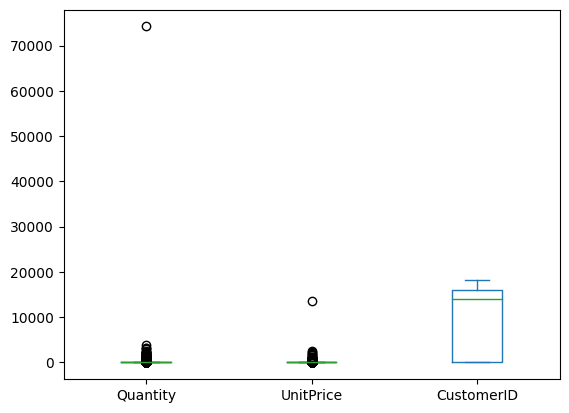

In [ ]:
#Identificação pelo gráfico
df.plot.box();

In [ ]:
from sklearn.preprocessing import scale

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Função para calcular o Z-Score

data = pd.Series([5000,10000])

def calculate_z_scores(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(point - mean) / std_dev for point in data]
    return z_scores

In [ ]:
# Filtrando os dados para remover outliers

def remove_outliers(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = np.abs((data - mean) / std_dev)
    filtered_data = data[(z_scores < threshold) & (data < 5000)]
    return filtered_data

In [ ]:
Quantity = np.array([100, 200, 500, 10000, 15000])
UnitPrice = np.array([1000, 3000, 6000, 7000, 8000])

In [ ]:
#Verificando a quantidade de outliers

Quantity_filtrada = remove_outliers(Quantity)
UnitPrice_filtrado = remove_outliers(UnitPrice)

print("Quantidades filtradas:", Quantity_filtrada)
print("Preços filtrados:", UnitPrice_filtrado)

Quantidades filtradas: [100 200 500]
Preços filtrados: [1000 3000]


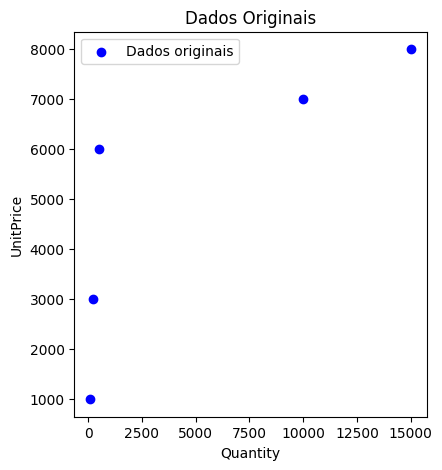

In [ ]:
# Gráfico 1: Dados originais com outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(Quantity, UnitPrice, color='blue', label='Dados originais')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Dados Originais')
plt.legend()

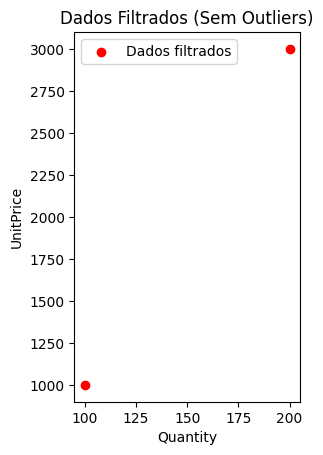

In [ ]:
# Gráfico 2: Dados após a remoção de outliers
plt.subplot(1, 2, 2)
plt.scatter(Quantity_filtrada, UnitPrice_filtrado, color='red', label='Dados filtrados')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('Dados Filtrados (Sem Outliers)')
plt.legend()

In [ ]:
#Nova coluna com o valor total da compra
df['Preço total da compra'] = df ['Quantity'] + df['UnitPrice']

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço total da compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,8.55
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,9.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,10.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,9.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,9.39


### Última data de compra

In [ ]:
from datetime import datetime

In [ ]:
#Última data de compra
consulta = '''
SELECT MAX (InvoiceDate) FROM df

'''
resultado = sqldf (consulta)
print(resultado)

            MAX (InvoiceDate)
0  2011-04-19 00:00:00.000000


### **Top 10 países com maior valor em vendas e gráfico**

In [ ]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', nan],
      dtype=object)

In [ ]:
#Verificação dos Top 10 países com maior valor em vendas
data = {
    'Country': ['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'],
    'Vendas': [10, 20, 15, 30, 25, 40, 35, 45, 50, 60]
}


In [ ]:
vendas_por_pais = df.groupby('Country')['Preço total da compra'].sum()


In [ ]:
vendas_por_pais_ordenado = vendas_por_pais.sort_values(ascending=False)

In [ ]:
top_10_paises = vendas_por_pais_ordenado.head(10)
print("Os 10 países que mais venderam:")
print(top_10_paises)


Os 10 países que mais venderam:
Country
United Kingdom    1958397.47
Netherlands         61382.88
EIRE                44862.41
Germany             40923.56
France              38219.26
Australia           26949.90
Japan               15583.25
Sweden              13322.61
Spain               11323.22
Singapore            8962.11
Name: Preço total da compra, dtype: float64


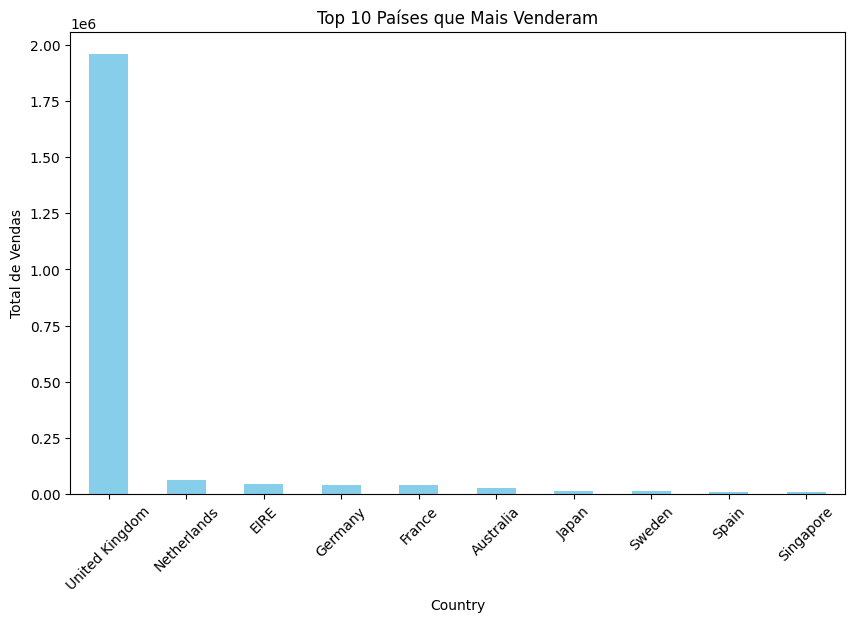

In [ ]:
#Gráfico Top 10 países com maior valor em vendas
plt.figure(figsize=(10, 6))
top_10_paises.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países que Mais Venderam')
plt.xlabel('Country')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

### Top 10 produtos com maior valor em vendas e gráfico

In [ ]:
#Top 10 produtos com maior valor em vendas
vendas_por_produtos = df.groupby('Description')['Preço total da compra'].sum()

In [ ]:
vendas_por_produtos_ordenado = vendas_por_produtos.sort_values(ascending=False)

In [ ]:
top_10_produtos = vendas_por_produtos_ordenado.head(10)
print("Os 10 produtos que mais venderam:")
print(top_10_produtos)

Os 10 produtos que mais venderam:
Description
MEDIUM CERAMIC TOP STORAGE JAR        74216.04
DOTCOM POSTAGE                        65121.40
Manual                                21690.96
WORLD WAR 2 GLIDERS ASSTD DESIGNS     20528.58
WHITE HANGING HEART T-LIGHT HOLDER    19246.45
REGENCY CAKESTAND 3 TIER              16819.55
JUMBO BAG RED RETROSPOT               16628.34
PACK OF 72 RETROSPOT CAKE CASES       15515.73
AMAZON FEE                            13763.09
SMALL POPCORN HOLDER                  12062.27
Name: Preço total da compra, dtype: float64


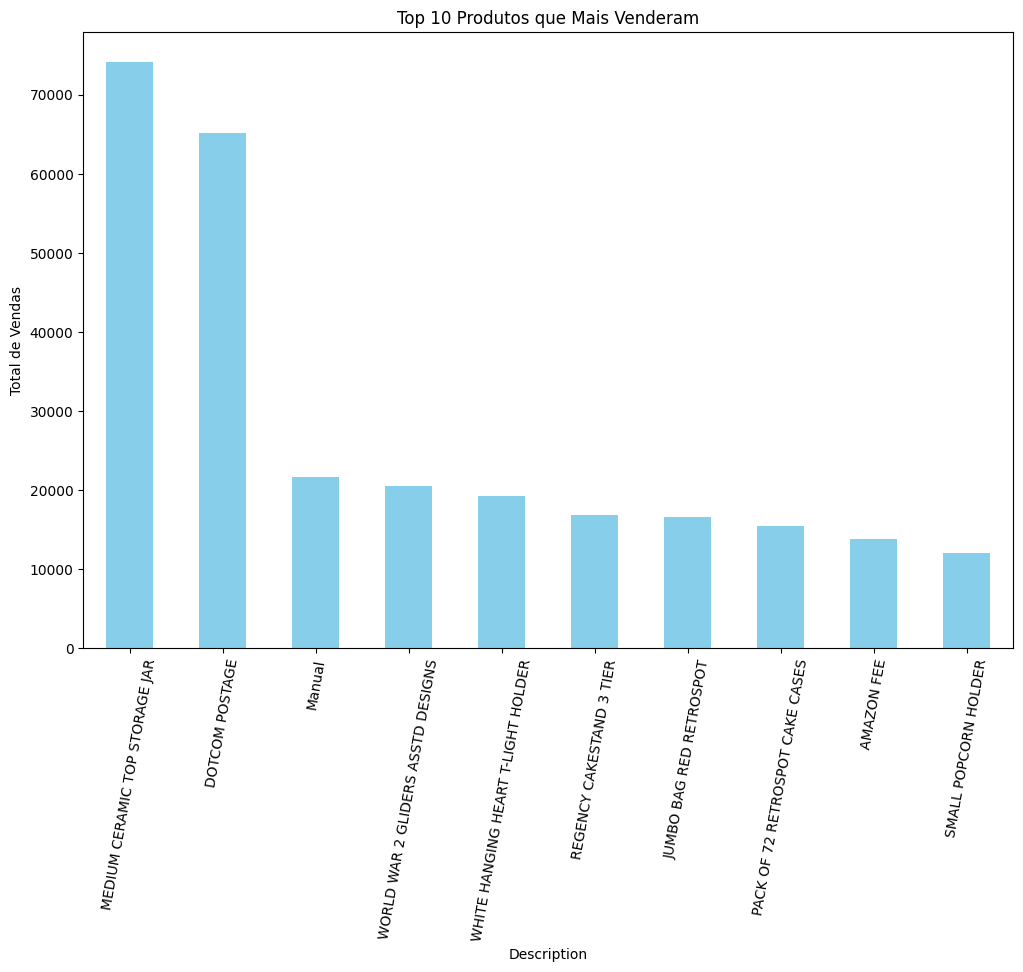

In [ ]:
#Gráfico Top 10 produtos com maior valor em vendas
plt.figure(figsize=(12, 8))
top_10_produtos.plot(kind='bar', color='skyblue')
plt.title('Top 10 Produtos que Mais Venderam')
plt.xlabel('Description')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=80)
plt.show()

### **Valor de venda total por Mês e gráfico**

In [ ]:
#Valor de venda total por mês
df['InvoiceDate'].unique()


<DatetimeArray>
['2010-12-01 00:00:00', '2010-12-02 00:00:00', '2010-12-03 00:00:00',
 '2010-12-05 00:00:00', '2010-12-06 00:00:00', '2010-12-07 00:00:00',
 '2010-12-08 00:00:00', '2010-12-09 00:00:00', '2010-12-10 00:00:00',
 '2010-12-12 00:00:00',
 ...
 '2011-04-10 00:00:00', '2011-04-11 00:00:00', '2011-04-12 00:00:00',
 '2011-04-13 00:00:00', '2011-04-14 00:00:00', '2011-04-15 00:00:00',
 '2011-04-17 00:00:00', '2011-04-18 00:00:00', '2011-04-19 00:00:00',
                 'NaT']
Length: 112, dtype: datetime64[ns]

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
vendas_por_mes = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Preço total da compra'].sum().head(10)
print("Valor total de vendas por mês:")
print(vendas_por_mes)


Valor total de vendas por mês:
InvoiceDate
2010-12    559143.47
2011-01    517520.01
2011-02    391724.96
2011-03    523154.24
2011-04    295331.18
Freq: M, Name: Preço total da compra, dtype: float64


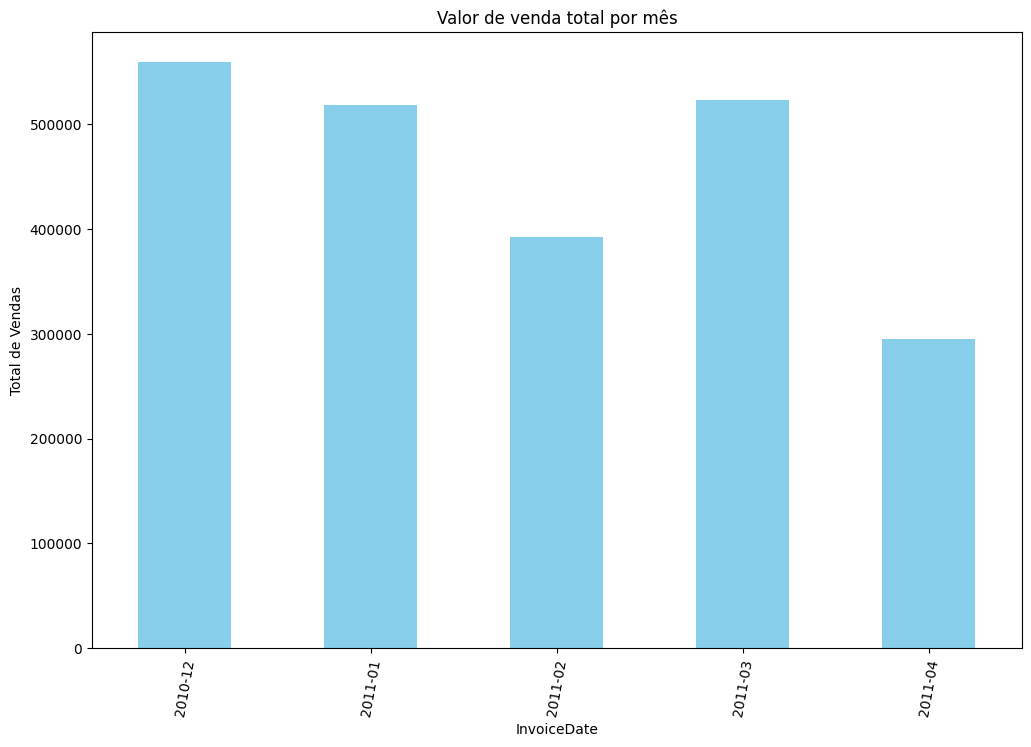

In [ ]:
#Valor de venda total por mês
plt.figure(figsize=(12, 8))
vendas_por_mes.plot(kind='bar', color='skyblue')
plt.title('Valor de venda total por mês')
plt.xlabel('InvoiceDate')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=80)
plt.show()

### Verificação dos dados por Mês e País e gráfico

In [ ]:
#Valor de venda total por mês e por país
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [ ]:
# Agrupando por mês e país e somando as vendas
vendas_por_mes_pais = df.groupby([df['InvoiceDate'].dt.to_period('M'), 'Country'])['Preço total da compra'].sum().reset_index().head(10)


In [ ]:
vendas_por_mes_pais.columns = ['InvoiceDate', 'Country', 'Preço total da compra']

print("Valor total de vendas por mês e por país:")
print(vendas_por_mes_pais)


Valor total de vendas por mês e por país:
  InvoiceDate          Country  Preço total da compra
0     2010-12        Australia                 597.81
1     2010-12          Austria                 115.70
2     2010-12          Bahrain                  57.81
3     2010-12          Belgium                2028.35
4     2010-12  Channel Islands                 240.64
5     2010-12           Cyprus                1115.68
6     2010-12          Denmark                 546.97
7     2010-12             EIRE                7615.82
8     2010-12          Finland                1303.60
9     2010-12           France                6526.51


In [ ]:
total_venda_por_pais = df.groupby('Country')['Preço total da compra'].sum()


In [ ]:
top_10_paises = total_venda_por_pais.nlargest(10).index

In [ ]:
df_top_10 = df[df['Country'].isin(top_10_paises)]

In [ ]:
venda_por_mes_pais = df_top_10.groupby(['InvoiceDate', 'Country'])['Preço total da compra'].sum().unstack().fillna(0)

In [ ]:
print(venda_por_mes_pais)

Country      Australia     EIRE  France  Germany    Japan  Netherlands  \
InvoiceDate                                                              
2010-12-01       180.9   376.64  504.29   201.37     0.00       113.85   
2010-12-02         0.0     9.75    0.00   191.45     0.00         0.00   
2010-12-03         0.0  2913.76  328.88   285.84     0.00         0.00   
2010-12-05         0.0     0.00  898.19  1734.58   224.99         0.00   
2010-12-06         0.0   829.40    0.00   137.33     0.00         0.00   
...                ...      ...     ...      ...      ...          ...   
2011-04-14         0.0     0.00  412.16  1670.57     0.00         0.00   
2011-04-15         0.0     0.00    0.00     0.00     0.00         0.00   
2011-04-17         0.0   319.14  493.69     0.00     0.00         0.00   
2011-04-18         0.0     0.00    0.00   223.75  6441.26         0.00   
2011-04-19         0.0     0.00    0.00   825.70     0.00         0.00   

Country      Singapore   Spain  Swede

In [ ]:
vendas_por_mes_pais = df.groupby(['InvoiceDate', 'Country'])['Preço total da compra'].sum().unstack()


In [ ]:
top_paises = vendas_por_mes_pais.sum().nlargest(10).index

In [ ]:
vendas_top_paises = vendas_por_mes_pais[top_paises]


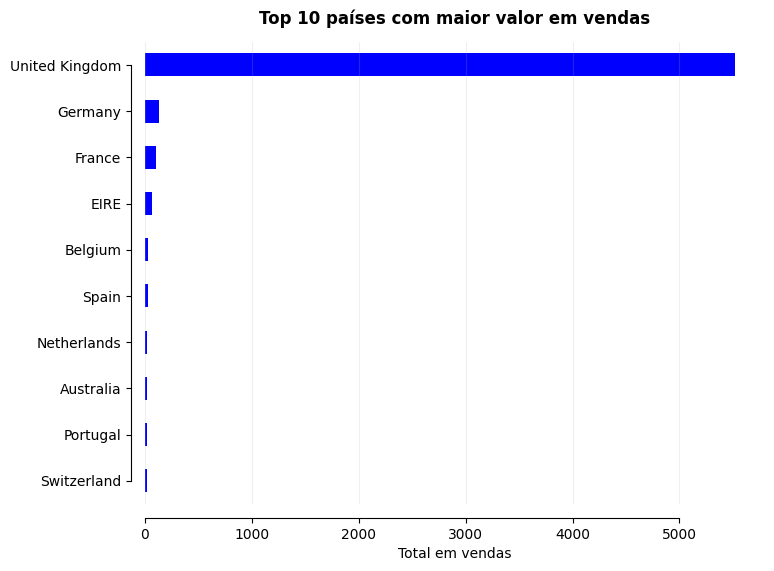

In [ ]:
df_top_10_paises = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).head(10)
df_top_10_paises[::-1].plot(kind='barh', color='blue', figsize=(8,6))
plt.title('Top 10 países com maior valor em vendas', weight='bold', y=1.02)
plt.xlabel('Total em vendas')
plt.ylabel(None)
plt.grid(axis='x', alpha=.2)
sns.despine(trim=True, offset=10)
plt.show()


In [ ]:
df.head(300)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Preço total da compra
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01,2.55,17850,United Kingdom,8.55
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01,3.39,17850,United Kingdom,9.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01,2.75,17850,United Kingdom,10.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01,3.39,17850,United Kingdom,9.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01,3.39,17850,United Kingdom,9.39
...,...,...,...,...,...,...,...,...,...
304,536398,22632,HAND WARMER RED RETROSPOT,12.0,2010-12-01,2.10,13448,United Kingdom,14.10
305,536398,22866,HAND WARMER SCOTTY DOG DESIGN,12.0,2010-12-01,2.10,13448,United Kingdom,14.10
306,536398,22865,HAND WARMER OWL DESIGN,12.0,2010-12-01,2.10,13448,United Kingdom,14.10
307,536398,21232,STRAWBERRY CERAMIC TRINKET BOX,12.0,2010-12-01,1.25,13448,United Kingdom,13.25


# **Calculo RFM**

In [ ]:
#Calculando RFM
#Agrupando dados por clientes e pedidos

df_agrupado = df.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'max', 'Preço total da compra': 'sum'}).reset_index()


In [ ]:
#Verificação dos daods por tabela
df_agrupado.head(10)

,CustomerID,InvoiceNo,InvoiceDate,Preço total da compra
0,0,536544,2010-12-01,4195.72
1,0,536555,2010-12-01,4.97
2,0,536558,2010-12-01,24.95
3,0,536565,2010-12-01,8.70
4,0,536592,2010-12-01,5090.35
5,0,536596,2010-12-01,43.34
6,0,536640,2010-12-02,56.85
7,0,536755,2010-12-02,69.25
8,0,536756,2010-12-02,86.65
9,0,536780,2010-12-02,16.80


In [ ]:
# Agrupando novamente apenas por cliente
df_cliente = df_agrupado.groupby('CustomerID')


In [ ]:
print(df_cliente)

In [ ]:
#Verificação do último pedido feito
df_agrupado.agg({'InvoiceDate': 'max', 'Preço total da compra': 'sum'}).head()

InvoiceDate              2011-04-19 00:00:00
Preço total da compra             2286873.86
dtype: object

In [ ]:
#Recência
R = pd.to_datetime('2011-04-19') - pd.to_datetime(df_agrupado['CustomerID'].max())
print(R)

15082 days 23:59:59.999981717


In [ ]:
# Frequência
F = df_cliente.size()
F.head(10)

CustomerID
0        559
12346      1
12347      3
12348      3
12350      1
12352      5
12356      2
12359      2
12361      1
12362      1
dtype: int64

In [ ]:
# Ticket médio
M = df_cliente['Preço total da compra'].sum()
M.head(20)

CustomerID
0        449373.48
12346     74216.04
12347      1342.05
12348      2260.21
12350       262.30
12352      1297.08
12356      1751.17
12359      1710.99
12361       124.35
12362       301.20
12363       318.50
12365       551.31
12370      2357.57
12372       287.93
12373       261.15
12377      1153.35
12383      1768.01
12386       377.91
12388       432.25
12393       612.95
Name: Preço total da compra, dtype: float64

In [ ]:
#Visualização da tabela RFM
rfm.columns = ['CustomerID', 'R', 'F', 'M']
print(rfm.head(10))

   CustomerID   R    F             M
0           0   0  559    803.888157
1       12346  91    1  74216.040000
2       12347  12    3    447.350000
3       12348  14    3    753.403333
4       12350  76    1    262.300000
5       12352  28    5    259.416000
6       12356  11    2    875.585000
7       12359  71    2    855.495000
8       12361  53    1    124.350000
9       12362  61    1    301.200000
